<a href="https://colab.research.google.com/github/astrovishalthakur/DeepLearning/blob/main/Keras/GraduatePrediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mohansacharya/graduate-admissions

  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 6.24MB/s]


In [6]:
! unzip graduate-admissions.zip

Archive:  graduate-admissions.zip
  inflating: Admission_Predict.csv   
  inflating: Admission_Predict_Ver1.1.csv  


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("Admission_Predict.csv")

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(400, 9)

In [16]:
df.drop(columns=["Serial No."], inplace=True)

In [17]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<h1>Architecture:</h1>
<h2>7 inputs ---> 7 noded hidden layer ---> single noded output layer.

Trainable parametres
1. 1 layer weights = 7*7 = 49
2. 2 layer bias = 7
3. 2 layer weights = 7*1 = 1
4. 3 layer bias = 1
bold text

In [21]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [22]:
X = df.drop(columns=["Chance of Admit "])

In [26]:
y = df["Chance of Admit "]

In [27]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [28]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [30]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [34]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

### For regression problem, activation function of output node should be linear

In [45]:
model = Sequential()
model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="linear"))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='mean_squared_error', optimizer="Adam")

In [51]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 11/100
8/8 [===========

In [52]:
y_pred = model.predict(X_test_scaled)

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7907378428776365

In [54]:
import matplotlib.pyplot as plt

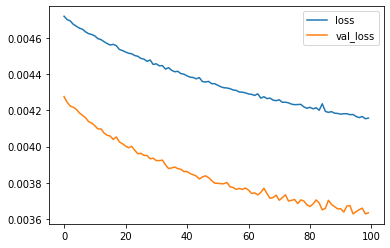

In [59]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()